These notebooks work with python 3, networkx 2.3 (see also my other settings below).

In [1]:
#check which python
import sys
print(sys.executable)

/usr/bin/python3


In [2]:
#check which networkx
import networkx as nx
print(nx.__version__)

2.3


$ jupyter --version  
jupyter core     : 4.5.0  
jupyter-notebook : 5.7.8  
qtconsole        : 4.4.1  
ipython          : 7.6.1  
ipykernel        : 5.1.1  
jupyter client   : 5.3.1  
jupyter lab      : not installed  
nbconvert        : 5.5.0  
ipywidgets       : 7.4.1  
nbformat         : 4.4.0  
traitlets        : 4.3.2

jupyter nbconvert HKcourse1.ipynb --to slides --post serve

# Some Facets of Information Theoretical Graph Analytics

F. Oggier (School of Physical and Mathematical Sciences, NTU, Singapore) 

CSCIT 2019, CUHK


<div style="background-color:rgba(0, 0, 0, 1); text-align:left; vertical-align: middle; padding:20px 0;">
<img src="wbr.png" width=500 height=500 hspace="100">
</div>


###  Centralities and Entropic Centralities

### Random Graphs and Power Law

### Information Theoretic Clustering

### A Case Study: Bitcoin Forensics

## Goals of these lectures

Given a graph, you will know
* how to compute different node centralities
* decide whether it is a free scale graph (and what it means)
* how to cluster its nodes
* (if you wish) how to get started with NetworkX

You will also have an overview of (some of) the information theoretic techniques for clustering. This is of course a very *biased* view point, if you like this topic, there is a lot more to read (some pointers will be given). 

## Centralities and Entropic Centralities

no of vertices: 34
no of edges 78


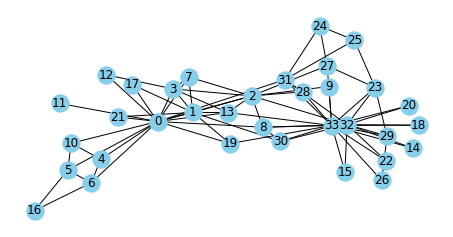

In [2]:
import networkx as nx
import matplotlib.pylab as plt

G =  nx.karate_club_graph()
print('no of vertices:',G.order())
print('no of edges',G.size())
pos = nx.spring_layout(G)
fig = plt.figure(figsize=(6,3))
nx.draw(G,pos, with_labels = 'true',node_color = 'skyblue')
plt.show()

Given a (directed) simple graph $G=(V,E,w)$, with vertex set $V$, edge set $E$ and possibly a weight function $w:E\rightarrow\mathbb{R}_{\geq 0}$, which nodes are *important*?

This leads to the notion of **node centrality**.


An obvious definition is **degree centrality** (Shaw 54, Freeman 79).
<div style="background-color:rgba(128, 0, 0, 0.1); text-align:left; vertical-align: middle; padding:20px 0;">
For $v$ in $V$, $c_D(v)=deg(v)$, alternatively $c'_D(v)=\frac{c_D(v)}{|V|-1}$.
</div>
For a directed graph, in- and out-degrees can be considered, if $G$ is weighted, then the weighted degree $deg_w(v)=\sum_e w(e)$ is used, where the sum is over all edges $e$ adjacent to $v$ (*be cautious* about the meaning). 

* lots of friends
* spread of a disease
* bibliographic analysis and paper citations

Another popular definition is **betweenness centrality** (Freeman 77).
<div style="background-color:rgba(128, 0, 0, 0.1); text-align:left; vertical-align: middle; padding:20px 0;">
For $v$ in $V$, $c_B(v) = \sum_{s\neq v \neq t \in V}\frac{\sigma_{st}(v)}{\sigma_{st}}$, alternatively $c'_B(v)=\frac{c_B(v)}{(|V|-1)(|V|-2)/2}$.
</div>
Here, $\sigma_{st}$ is the total number of shortest paths from $s$ to $t$ and $\sigma_{st}(v)$ is the number of paths in $\sigma_{st}$ passing through $v$.
For a directed graph, use directed paths, and normalize by $(|V|-1)(|V|-2)$ instead. It works for weighted graphs (Dijkstra's algorithm) with the same warning as above.

* in a communication network, more information passing through, more control over the network. 
* in a social network, members through which rumours are being relayed. 

A third definition is **closeness centrality** (Bavelas 50).
<div style="background-color:rgba(128, 0, 0, 0.1); text-align:left; vertical-align: middle; padding:20px 0;">
For $v$ in $V$, $c_C(v)=\frac{1}{\sum_{u\in V,u\neq v}d(u,v)}$, alternatively $c'_C(v)=\frac{c_C(v)}{|V|-1}$
</div>
for a connected graph. It also applies for directed and weighted graphs.

* it is not about having many direct friends (degree centrality), or being between other friends (betweenness centrality), but about about being in the ``middle" of things.

In [3]:
#compute centralities
cD = nx.degree_centrality(G)
cB = nx.betweenness_centrality(G)
cC = nx.closeness_centrality(G)
#sort by increasing order and display the most central nodes
sortedcD = sorted(cD.items(), key=lambda kv: kv[1])
sortedcD.reverse()
sortedcB = sorted(cB.items(), key=lambda kv: kv[1])
sortedcB.reverse()
sortedcC = sorted(cB.items(), key=lambda kv: kv[1])
sortedcC.reverse()
print('degree')
print(sortedcD[0:4])
print('betweenness')
print(sortedcB[0:4])
print('closeness')
print(sortedcC[0:4])

degree
[(33, 0.5151515151515151), (0, 0.48484848484848486), (32, 0.36363636363636365), (2, 0.30303030303030304)]
betweenness
[(0, 0.43763528138528146), (33, 0.30407497594997596), (32, 0.145247113997114), (2, 0.14365680615680618)]
closeness
[(0, 0.43763528138528146), (33, 0.30407497594997596), (32, 0.145247113997114), (2, 0.14365680615680618)]


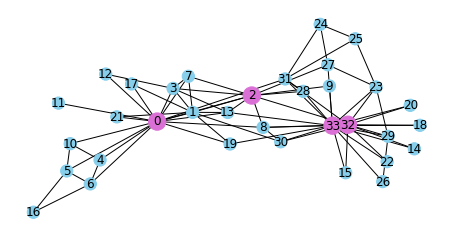

In [4]:
colors = []
sizes = []
listB = [x[0] for x in sortedcB[0:4]]
listD = [x[0] for x in sortedcD[0:4]]
for node in G:
    if node in listB:
        colors.append('orchid')
    else: colors.append('skyblue')      
    if node in listD:
        sizes.append(300)
    else: sizes.append(150) 
fig = plt.figure(figsize=(6,3))        
nx.draw(G,pos, with_labels = 'true',node_color = colors,node_size=sizes)
plt.show()

\ | low degree | low closeness | low betweenness
:---: | :---: | :---: | :---: 
high degree | x|$v$ has lots of connection within a cluster  | $v$ has lots of connections
            | x| which is far from the rest of the graph   | but communication bypassses $v$  
high closeness | $v$ is a key player | x | multiple paths make $v$ close, yet  
               | connected to highly connected players | x| so are many others through with network may flow 
high betweenness | $v$ has few connections | $v$ monopolizes the connections  | x
                 | which are important for network flow | from a small number of people to many others | x

Suppose the centrality of $v$ depends on both its neighbours and their own centrality (Bonacich 72): $c(u) = \sum_{v \in V} a_{vu}c(v)$, or $A^T c= c$, for $A$ the adjacency matrix of the graph, and $c$ the vector of centralities. This works only if $A$ has an eigenvalue at 1.

If instead we ask $c$ to be proportional to $\sum_{v \in V} a_{vu}c(v)$: $A^Tc =\lambda c$ and $c$ becomes an eigenvector of $A$.

<div style="background-color:rgba(128, 0, 0, 0.1); text-align:left; vertical-align: middle; padding:20px 0;">
The eigenvector (with positive entries) of $A$ corresponding to the largest eigenvalue gives a vector of centralities.
</div>

This is called the **eigenvector centrality**.

Continue (Bonacich-Loyd 01), and allow every node's centrality some status, called exogenous, which does not depend on the connection. We model the exogenous factor by a vector $e$, and write
$c = \alpha A^T c + e$, 
where $\alpha$ weights the importance of endogenous versus exogenous factors. 
This gives a vector $c$ of centralities computed by:

<div style="background-color:rgba(128, 0, 0, 0.1); text-align:left; vertical-align: middle; padding:20px 0;">
$c = (I -\alpha A^T)^{-1} e$.
</div>

This is called the **alpha centrality**.

Alternatively (Katz 53), influence could be measured by taking column sums of
$\sum_{i=1}^\infty a^i A^i$, 
where the powers of $A$ count the number of paths, giving a smaller weight to higher powers to attenuate the influence through longer paths.

The infinite sum converges to $(I-aA)^{-1}-I$ as long as $|a|<1/\lambda_1$, $\lambda_1$ is the largest eigenvalue.

Taking the column sum means taking the row sum with the transpose with $e$ the whole one vector and
<div style="background-color:rgba(128, 0, 0, 0.1); text-align:left; vertical-align: middle; padding:20px 0;">
$c=(\sum_{i=1}^\infty a^i (A^T)^i)e = ((I-aA^T)^{-1}-I)e$.
</div>

This is **Katz centrality**, which only differ from alpha centrality by $-I$.

With Katz centrality, a node with high centrality linked to many others will transmit high centralities to all of them.

However it may be desirable that high centrality is not diluted by generous endorsements. This leads to the notion of PageRank centrality.

In [5]:
cE = nx.eigenvector_centrality(G)
cK = nx.katz_centrality(G)
#sort by increasing order and display the most central nodes
sortedcE = sorted(cE.items(), key=lambda kv: kv[1])
sortedcE.reverse()
sortedcK = sorted(cK.items(), key=lambda kv: kv[1])
sortedcK.reverse()
print('eigenvector')
print(sortedcD[0:4])
print('Katz')
print(sortedcB[0:4])

eigenvector
[(33, 0.5151515151515151), (0, 0.48484848484848486), (32, 0.36363636363636365), (2, 0.30303030303030304)]
Katz
[(0, 0.43763528138528146), (33, 0.30407497594997596), (32, 0.145247113997114), (2, 0.14365680615680618)]


In [6]:
print('degree')
print(sortedcD[0:4])
print('betweenness')
print(sortedcB[0:4])
print('closeness')
print(sortedcC[0:4])
print('eigenvector')
print(sortedcD[0:4])
print('Katz')
print(sortedcB[0:4])

degree
[(33, 0.5151515151515151), (0, 0.48484848484848486), (32, 0.36363636363636365), (2, 0.30303030303030304)]
betweenness
[(0, 0.43763528138528146), (33, 0.30407497594997596), (32, 0.145247113997114), (2, 0.14365680615680618)]
closeness
[(0, 0.43763528138528146), (33, 0.30407497594997596), (32, 0.145247113997114), (2, 0.14365680615680618)]
eigenvector
[(33, 0.5151515151515151), (0, 0.48484848484848486), (32, 0.36363636363636365), (2, 0.30303030303030304)]
Katz
[(0, 0.43763528138528146), (33, 0.30407497594997596), (32, 0.145247113997114), (2, 0.14365680615680618)]


<div style="background-color:rgba(128, 0, 0, 0.1); text-align:left; vertical-align: middle; padding:20px 0;">
<b>degree</b>,<b>closeness</b>,harmonic,<b>betweenness</b>,<b>eigenvector</b>,<b>Katz</b>,PageRank,load,<b>alpha</b>,cross-clique,information,communicability,percolation,decay,diffusion...<b>entropic centralities</b>
</div>

Consider an unweighted (directed) graph $G=(V,E)$.

Compute the probability  $p_{u,v}$ that a random walk constrained such that it does not revisit any vertex (thus, only forming paths), starting at $u$ terminates at $v$. 

A self-loop is added to model the stop of the walk.  

At every node of the walk, choose an outgoing edge uniformly at random among the edges leading to unvisited nodes (or choose the self-loop to terminate the walk).  

Then the **entropic centrality** $C_H(u)$ of $u$ is defined to be (Tutzauer 07) 
<div style="background-color:rgba(128, 0, 0, 0.1); text-align:left; vertical-align: middle; padding:20px 0;">
$C_H(u) =  - \sum_{v\in V} p_{u,v} \log_2 p_{u,v}$.
</div>

See Nikolaev et al, for replacing paths by walks.

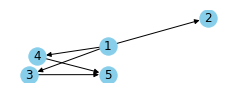

In [13]:
fig = plt.figure(figsize=(3,1))
G1 = nx.DiGraph()
G1.add_edges_from([(1,2),(1,3),(3,5),(1,4),(4,5)])
pos1 = nx.spring_layout(G1)
nx.draw(G1,pos1,with_labels="true",node_color ="skyblue")
plt.show()

In [14]:
import math
print('centrality of 1')
-((1/4)*math.log2(1/4)+(1/4)*math.log2(1/4)+(1/8)*math.log2(1/8)+(1/8)*math.log2(1/8)+(1/4)*math.log2(1/4))

centrality of 1


2.25

Characterization of centrality by flow (Borgatti 2005): a flow typology is given across 2 dimensions, the type of circulation (transfer, parallel/serial duplication) and the flow trajectories (geodesics, paths, walks).

* Transfer: an item or unit flows in an indivisible manner (e.g.,package delivery)
* Serial replication: both the node that sends the item and the one that receives it have the item (e.g., one-to-one gossip)
* Parallel duplication, where an item can be transmitted in parallel through all outgoing edges (e.g., epidemic spread). 

Betweenness is best suited for geodesics and transfer (geodesic = shortest path, suggests a target to be reached
as fast as possible). 

Eigenvector based centralities should be used for walks and parallel duplication (using Katz’s intuition, they count unconstrainted walks, every node influences all of its neighbours simultaneously).

**Question**: What centrality is good for financial networks? (e.g. Bitcoin)

The flow is transferred but not in an undivisible manner. And it is not duplicated. 
According to the characterization by flow, we should be looking at paths rather than eigenvectors: **split-and-transfer entropic centrality**.

A part $f_u$ of the flow reaches a node $u$. Let $\mathcal{N}_u$ be the set of outgoing neighbors of $u$ which have not yet been visited.

Let $\mathcal{E}_u$ denote the set of possible outgoing edge subsets. 

We attach a probability $q(x)$ to every choice $x$ in $\mathcal{E}_u$ ($\sum_{x\in \mathcal{E}_{u}} q(x) =1$).

Every $x$ in $\mathcal{E}_u$ corresponds to a set of edges $(u,v)$ for  $v$ a neighbour. Attach a weight $\omega_x(u,v)$ to every edge in $x$, such that $\sum_{(u,v)\in x} \omega_x(u,v) = f_u$.

Example: $\omega_x(u,v)=\tfrac{f_u}{i}$ for every $(u,v)$ in $x$ containing $i$ edges (uniform split).

Given $u$, compute the expected flow from $u$ to a chosen neighbour $v$. Every such choice of $x$ comes with a probability $q(x)$, and every edge $(u,v)$ in $x$ has a weight $\omega_x(u,v)$, which sums up to
$f_{uv} = \sum_{x\in\mathcal{E}_{u,v}}q(x)\omega_x(u,v)$, where $\mathcal{E}_{u,v}$ contains the sets in $\mathcal{E}_u$ themselves containing $v$.

When $v$ varies in $\mathcal{N}_u$, the sets $\mathcal{E}_{u,v}$ appearing in the summation $\sum_{v\in\mathcal{N}_u}\sum_{x\in\mathcal{E}_{u,v}}q(x)\omega_x(u,v)$ may intersect, so for each choice $x$, one can gather all the $\mathcal{E}_{u,v}$ that contains $x$. For this $x$, we find a term in the above sum of the form
$q(x)\sum_{(u,v)\in x} \omega_x(u,v) = q(x) f_u$.
Then
$\sum_{v\in\mathcal{N}_u}\sum_{x\in\mathcal{E}_{u,v}}q(x)\omega_x(u,v) = \sum_{x\in\mathcal{E}_{u}}q(x)f_u = f_u$.


By setting $f_u=1$, the quantity $f_{uv} = \sum_{x\in\mathcal{E}_{u,v}}q(x)\omega_x(u,v)$
becomes a probability $p_{uv}$. 

<div style="background-color:rgba(128, 0, 0, 0.1); text-align:left; vertical-align: middle; padding:20px 0;">
The <b>split-and-transfer entropic centrality</b> $C_{H,p}(u)$ of a node $u$ is given by 
$C_{H,p}(u) = - \sum_{v \in V} p_{uv}\log_2(p_{uv})$
where $p_{uv}$ is computed from the equation above, with the usual convention $0 \cdot \log_2 0 = 0$. 
</div>

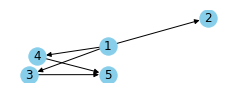

In [21]:
fig = plt.figure(figsize=(3,1))
nx.draw(G1,pos1,with_labels="true",node_color ="skyblue")
plt.show()

For $u=1$, $\mathcal{N}_u=\{1,2,3,4\}$, choose $q(\{2,3\})=\tfrac{1}{3}$, and $q(\{3,4\})=\tfrac{2}{3}$.

When the split is between 2,3: $\omega_{\{2,3\}}(1,2)=f_u\tfrac{2}{3}$, $\omega_{\{2,3\}}(1,3)=f_u\tfrac{1}{3}$. When the split is between 3,4: $\omega_{\{3,4\}}(1,3)=f_u\tfrac{1}{4}$, $\omega_{\{3,4\}}(1,4)=f_u\tfrac{3}{4}$.

Then $f_{1,2}=f_u\tfrac{2}{9}$. Also $f_{1,3}=f_u\tfrac{1}{9}+f_u\tfrac{1}{6}=f_u\tfrac{5}{18}$. 
Similarly $f_{1,4}=f_u\tfrac{1}{2}$ (indeed $f_u\tfrac{2}{9}+f_u\tfrac{5}{18}+f_u\tfrac{1}{2}=f_u$). Setting $f_u=1$:  $p_{1,2}=\tfrac{2}{9}$, $p_{1,3}=\tfrac{5}{18}$, $p_{1,4}=\tfrac{1}{2}$.

Then $f_{3}=f_{1,3}$ and $f_{4} = f_{1,4}$ so with equal weights both at 3 and 4:
$f_{3,5} = \tfrac{1}{2}f_{3} = f_u\tfrac{1}{2}\tfrac{5}{18},~
f_{4,5} = \tfrac{1}{2}f_{4} = f_u\tfrac{1}{2}\tfrac{1}{2},~
f_{v_5} =  f_{v_3,v_5} + f_{v_4,v_5} = f_u\tfrac{7}{18}$. 

Correspondingly by setting $f_{3}=f_{4}=1$: 
$p_{3,5} = \tfrac{1}{2},~p_{4,5} = \tfrac{1}{2}$. 


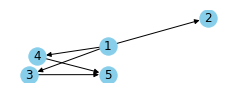

In [22]:
fig = plt.figure(figsize=(3,1))
nx.draw(G1,pos1,with_labels="true",node_color ="skyblue")
plt.show()

$p_{1,2}=\tfrac{2}{9}$, $p_{1,3}=\tfrac{5}{18}$, $p_{1,4}=\tfrac{1}{2}$,$p_{3,5} = \tfrac{1}{2},~p_{4,5} = \tfrac{1}{2}$. Thus $p_{3,3}=p_{4,4}=\tfrac{1}{2}$.

In [23]:
print('centrality of 1')
print(-((2/9)*math.log2(2/9)+(5/36)*math.log2(5/36)+(1/4)*math.log2(1/4)+(5/36+1/4)*math.log2(5/36+1/4)))

centrality of 1
1.9076490459916435



<img src="bcsub.png" width=500 height=500>
A 4571 node directed weighted Bitcoin address subgraph, https://doi.org/10.21979/N9/IEPBXV. DR-NTU.


address | $C_{H,p}$ | $f_u$ | out | alpha/Katz rank
:---: | :---: | :---: | :---: | :---:
3CD1QW6fjgTwKq3Pj97nty28WZAVkziNom | 8.663332385 | 0.047377226 | 2807 |1
38PjB1ghFrD9UQs7HV5n15Wt1i3mZP8Wke | 5.721441871 | 0.19610282 | 382|3
3Eab4nDg6WJ5WR1uvWQirtMzWaA34RQk9s | 5.433971682 | 0.177882439 | 568|2
3MYqQJ5LbDe9U3drsaDprKxWobVZA3UgAw | 5.331666192 | 0.927034097 | 2|4
38mMQxz4knqfmecjLW3atdygfWxvvnJfg7 | 5.331666192 | 0.926888565 | 2|4
33XZf8Ys9sbqnAKynA4yBckyzwN3SEZaU7 | 5.331666192 | 0.925407445 | 2|4
3P4C7jpF1oxHgxqt4VgMRcCBEV3YEpaDUm | 5.331666192 | 0.92248333 | 2|4
3Fp5ejYY8FsJ6Y3kb377VRjJunTeUVYsuq | 5.331666192 | 0.896621459 | 2|4
3Q9SPyCN95szQUoQYgAHKgdhC3YnRsrFrW | 5.331666192 | 0.892827473 | 2|4
38A6nGSMR59WHVnj9gaJ2Cm62y9kFE318i | 5.331666192 | 0.890820737 | 2|4
3Ce7jUQn2RH5Ysdb4VvShoYymZLpkcqaAA | 5.331666192 | 0.88775841 | 2|4
364qbSJFhwkBgZnMuhmUHdczpaZNS2PmE6 | 5.331666192 | 0.883268612 | 2|4
3KDgKr3qov4Ws5WPnaA2RHjcE1N2UeVYs3 | 5.331666192 | 0.861964026 | 2|4
1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4 | 5.331666192 | 0.117536609 | 2|4

* Many (many many) notions of centrality
* Entropic centralities
* Captures a notion of spread, not just the influence of the direct neighbours, without deduplication (eigenvector based centralities)
* Different centrality (Kendall rank correlation coefficient)
* Split-and-transfer for financial networks
* May be used with either directionality
* Computational issues (horizon)

* Estrada, E. (2011). The Structure of Complex Networks: Theory and Applications.
* Tutzauer, F. (2007). Entropy as a measure of centrality in networks characterized by path-transfer flow. Social Networks, 29.
* Nikolaev, A. G., Razib, R., and Kucheriya, A. (2015). On efficient use of entropy centrality for social network analysis and community detection. Social Networks, 40.
* Oggier, F., Silivanxay, P., and Datta, A. (2018). Entropic centrality for non-atomic flow network. In International Symposium on Information Theory and its Applications (ISITA).
* Oggier, F., Silivanxay, P., and Datta, A. (preprint). A Split-and-Transfer Flow Based Entropic Centrality.